<a href="https://colab.research.google.com/github/galbendavids/CLALIT_Project/blob/main/UKBB_second_modeling_march_2021_(after_table1_and_first_modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

#remove later nrows=9999
df=pd.read_csv("/content/drive/MyDrive/תואר שני/תזה/data/df_united_o&n_.csv",nrows=999)
print(df.shape)
columns=df.columns


(999, 361)


In [ ]:
for col in columns:
  print(col)
df['NAFLD-IND']=df['NAFLD-IND_y']
df=df.drop(columns=['NAFLD-IND_y'])


Unnamed: 0
Unnamed: 0_x
Unnamed: 0.1_x
eid
sex
YearOfBirth
Waist circumference_x
Hip circumference_x
Standing height_x
Seated height_x
Systolic blood pressure
Diastolic blood pressure
Pulse rate
Number of days/week of moderate physical activity 10+ minutes_x
Number of days/week of vigorous physical activity 10+ minutes_x
Frequency of walking for pleasure in last 4 weeks_x
Frequency of strenuous sports in last 4 weeks_x
Time spend outdoors in summer_x
Sleep duration_x
Nap during day_x
Sleeplessness / insomnia_x
Snoring_x
Current tobacco smoking_x
Past tobacco smoking_x
Exposure to tobacco smoke at home_x
Exposure to tobacco smoke outside home_x
Salad / raw vegetable intake_x
Fresh fruit intake_x
Oily fish intake_x
Non-oily fish intake_x
Processed meat intake_x
Poultry intake_x
Beef intake_x
Lamb/mutton intake_x
Pork intake_x
Water intake_x
Alcohol intake frequency
Average weekly beer plus cider intake_x
Frequency of depressed mood in last 2 weeks_x
Seen doctor (GP) for nerves, anxiety, 

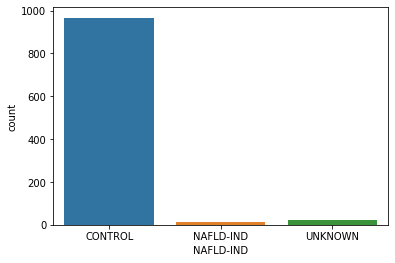

(999, 361)
[('CONTROL', 967), ('NAFLD-IND', 11), ('UNKNOWN', 21)]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['NAFLD-IND'],label="Sum")

plt.show()
print(df.shape)
from collections import Counter
print(sorted(Counter(df['NAFLD-IND']).items()))

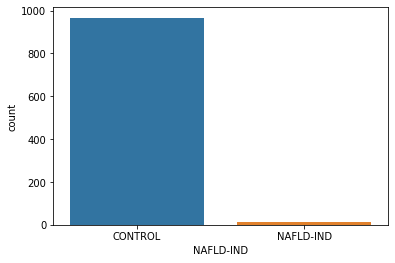

(978, 361)
[('CONTROL', 967), ('NAFLD-IND', 11)]


In [ ]:
df=df.loc[df['NAFLD-IND']!="UNKNOWN",:]

sns.countplot(df['NAFLD-IND'],label="Sum")

plt.show()
print(df.shape)
from collections import Counter
print(sorted(Counter(df['NAFLD-IND']).items()))

In [ ]:

df['NAFLD-IND']=df['NAFLD-IND'].map({'NAFLD-IND':1,'CONTROL':0})


In [ ]:
'''
#this ruins the specifity of the model..

df['NAFLD-IND']=df['NAFLD-IND'].map({'NAFLD-IND':True,'CONTROL':False,'UNKNOWN':False})
'''

"\n#this ruins the specifity of the model..\n\ndf['NAFLD-IND']=df['NAFLD-IND'].map({'NAFLD-IND':True,'CONTROL':False,'UNKNOWN':False})\n"

In [ ]:
df.dropna()
'''
features i need to ask nadav what to with it as there are no a lot of apperaences yet they are important

col='Proton density fat fraction (PDFF)'
#asked nadav.. for the moment only 4616 items..





'''

columns=(df.columns)
for col in columns:
  print(col)
'''
df=df.drop(columns=['Unnamed: 0','Liver iron corrected T1 (ct1)','Total trunk fat volume','Abdominal fat ratio','Muscle fat infiltration','10P Liver PDFF (proton density fat fraction)'])
col_labels=df.columns
for c in col_labels:
    no_missing = df[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
df.shape


'''

Unnamed: 0
Unnamed: 0_x
Unnamed: 0.1_x
eid
sex
YearOfBirth
Waist circumference_x
Hip circumference_x
Standing height_x
Seated height_x
Systolic blood pressure
Diastolic blood pressure
Pulse rate
Number of days/week of moderate physical activity 10+ minutes_x
Number of days/week of vigorous physical activity 10+ minutes_x
Frequency of walking for pleasure in last 4 weeks_x
Frequency of strenuous sports in last 4 weeks_x
Time spend outdoors in summer_x
Sleep duration_x
Nap during day_x
Sleeplessness / insomnia_x
Snoring_x
Current tobacco smoking_x
Past tobacco smoking_x
Exposure to tobacco smoke at home_x
Exposure to tobacco smoke outside home_x
Salad / raw vegetable intake_x
Fresh fruit intake_x
Oily fish intake_x
Non-oily fish intake_x
Processed meat intake_x
Poultry intake_x
Beef intake_x
Lamb/mutton intake_x
Pork intake_x
Water intake_x
Alcohol intake frequency
Average weekly beer plus cider intake_x
Frequency of depressed mood in last 2 weeks_x
Seen doctor (GP) for nerves, anxiety, 

"\ndf=df.drop(columns=['Unnamed: 0','Liver iron corrected T1 (ct1)','Total trunk fat volume','Abdominal fat ratio','Muscle fat infiltration','10P Liver PDFF (proton density fat fraction)'])\ncol_labels=df.columns\nfor c in col_labels:\n    no_missing = df[c].isnull().sum()\n    if no_missing > 0:\n        print(c)\n        print(no_missing)\ndf.shape\n\n\n"

In [ ]:
#change this later, why should we delete any?
df.drop(columns=['Unnamed: 0_y',
                    'Unnamed: 0.1_y',
                    '6177-0.0',
                    '30620-0.0',
                    '30620-1.0',
                    '30650-0.0',
                    '30650-1.0',
                    '30710-0.0',
                    '30710-1.0',
                    '130692-0.0',
                    '130702-0.0',
                    '130704-0.0',
                    '131286-0.0',
                    '132360-0.0',
                    'eid.1',
                    'Unnamed: 0_y',
                    'Unnamed: 0.1_y',
                    '130199-0.0',
                    '131286-0.0',
                    '20626-0.0',
                    
                    'Total trunk fat volume',
                    'Abdominal fat ratio',
                    'Muscle fat infiltration',
                    '10P Liver PDFF (proton density fat fraction)'
                 ])

#last four cause they are bad and also 'Liver iron corrected T1 (ct1)'
columns=(df.columns)
for col in columns:
  print(col)

Unnamed: 0
Unnamed: 0_x
Unnamed: 0.1_x
eid
sex
YearOfBirth
Waist circumference_x
Hip circumference_x
Standing height_x
Seated height_x
Systolic blood pressure
Diastolic blood pressure
Pulse rate
Number of days/week of moderate physical activity 10+ minutes_x
Number of days/week of vigorous physical activity 10+ minutes_x
Frequency of walking for pleasure in last 4 weeks_x
Frequency of strenuous sports in last 4 weeks_x
Time spend outdoors in summer_x
Sleep duration_x
Nap during day_x
Sleeplessness / insomnia_x
Snoring_x
Current tobacco smoking_x
Past tobacco smoking_x
Exposure to tobacco smoke at home_x
Exposure to tobacco smoke outside home_x
Salad / raw vegetable intake_x
Fresh fruit intake_x
Oily fish intake_x
Non-oily fish intake_x
Processed meat intake_x
Poultry intake_x
Beef intake_x
Lamb/mutton intake_x
Pork intake_x
Water intake_x
Alcohol intake frequency
Average weekly beer plus cider intake_x
Frequency of depressed mood in last 2 weeks_x
Seen doctor (GP) for nerves, anxiety, 

In [ ]:
df=df.drop(columns=[  'Unnamed: 0'
  ,'Unnamed: 0_x'
  ,'Unnamed: 0.1_x'
                   

])



In [ ]:
columns=df.columns
for col in columns:
  print (col)

eid
sex
YearOfBirth
Waist circumference_x
Hip circumference_x
Standing height_x
Seated height_x
Systolic blood pressure
Diastolic blood pressure
Pulse rate
Number of days/week of moderate physical activity 10+ minutes_x
Number of days/week of vigorous physical activity 10+ minutes_x
Frequency of walking for pleasure in last 4 weeks_x
Frequency of strenuous sports in last 4 weeks_x
Time spend outdoors in summer_x
Sleep duration_x
Nap during day_x
Sleeplessness / insomnia_x
Snoring_x
Current tobacco smoking_x
Past tobacco smoking_x
Exposure to tobacco smoke at home_x
Exposure to tobacco smoke outside home_x
Salad / raw vegetable intake_x
Fresh fruit intake_x
Oily fish intake_x
Non-oily fish intake_x
Processed meat intake_x
Poultry intake_x
Beef intake_x
Lamb/mutton intake_x
Pork intake_x
Water intake_x
Alcohol intake frequency
Average weekly beer plus cider intake_x
Frequency of depressed mood in last 2 weeks_x
Seen doctor (GP) for nerves, anxiety, tension or depression_x
Seen a psychiat

In [ ]:
'''
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)

#import sklearn.metrics
#sorted(sklearn.metrics.SCORERS.keys())
'''

'\nX_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)\n\n#import sklearn.metrics\n#sorted(sklearn.metrics.SCORERS.keys())\n'

In [ ]:
'''
## test this one impute data..
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='minority')
print(X.shape)
print(y.shape)
X_sm, y_sm = smote.fit_sample(X, y)
df_sm = pd.DataFrame(X_sm)
df_sm['NAFLD-IND'] = y_sm
import matplotlib.pyplot as plt
groups = df_sm.groupby("NAFLD-IND")
for name, group in groups:
    plt.plot(group[0], group[1], marker="o", linestyle="", label=name)
plt.legend()
'''


'\n## test this one impute data..\nfrom imblearn.over_sampling import SMOTE\nsmote = SMOTE(ratio=\'minority\')\nprint(X.shape)\nprint(y.shape)\nX_sm, y_sm = smote.fit_sample(X, y)\ndf_sm = pd.DataFrame(X_sm)\ndf_sm[\'NAFLD-IND\'] = y_sm\nimport matplotlib.pyplot as plt\ngroups = df_sm.groupby("NAFLD-IND")\nfor name, group in groups:\n    plt.plot(group[0], group[1], marker="o", linestyle="", label=name)\nplt.legend()\n'

In [ ]:
#df.isna().any()[lambda x: x] 

In [ ]:
'''
# we have alredy eliminated a lot of features.
#this will be part 2
print(df.isna().any()[lambda x: x])

df['sex']=df['sex'].fillna('?')
df['YearOfBirth']=df['YearOfBirth'].fillna(1951.54)
df['Number of days/week of moderate physical activity 10+ minutes_x']=df['Number of days/week of moderate physical activity 10+ minutes_x'].fillna(3.66)
df['Past tobacco smoking_x']=df['Past tobacco smoking_x'].fillna('?')


data=df

col='Date K82 first reported (other diseases of gallbladder)'
data[col] = data[col].apply(lambda x: "indication" if not pd.isnull(x) else np.nan)
data[col]=data[col].fillna('?')

col='Degree bothered by chest pain in the last 3 months_y'
data[col]=data[col].replace([-600,],'not bothered')
data[col]=data[col].replace([-601],'a little')
data[col]=data[col].replace([-602],'a lot')
data[col]=data[col].replace([-818],'?')
data[col]=data[col].fillna('?')

col='Fruit smoothie intake'
data[col]=data[col].replace([4,5,600],'4 or more')
data[col]=data[col].replace([1],'1')
data[col]=data[col].replace([2],'2')
data[col]=data[col].replace([3],'3')
data[col]=data[col].replace([555],'half')
data[col]=data[col].fillna('?')

col='Intake of artificial sweetener added to tea'
data[col]=data[col].replace([111],'varied')
data[col]=data[col].replace([300],'3+')
data[col]=data[col].replace([2],'2')
data[col]=data[col].replace([1],'1')
data[col]=data[col].replace([555],'half')
data[col]=data[col].fillna('?')

col='Milk intake_y'
data[col]=data[col].replace([4,5,600],'4 or more')
data[col]=data[col].replace([1],'1')
data[col]=data[col].replace([2],'2')
data[col]=data[col].replace([3],'3')
data[col]=data[col].replace([555],'half')
data[col]=data[col].fillna('?')

df=data

##
#why is that? check later..

df.drop(columns=[
                 'Proton density fat fraction (PDFF)',
                 'Liver iron corrected T1 (ct1)','Abdominal fat ratio',
                 'Muscle fat infiltration','10P Liver PDFF (proton density fat fraction)'])


print(df.isna().any()[lambda x: x] )
'''

'\n# we have alredy eliminated a lot of features.\n#this will be part 2\nprint(df.isna().any()[lambda x: x])\n\ndf[\'sex\']=df[\'sex\'].fillna(\'?\')\ndf[\'YearOfBirth\']=df[\'YearOfBirth\'].fillna(1951.54)\ndf[\'Number of days/week of moderate physical activity 10+ minutes_x\']=df[\'Number of days/week of moderate physical activity 10+ minutes_x\'].fillna(3.66)\ndf[\'Past tobacco smoking_x\']=df[\'Past tobacco smoking_x\'].fillna(\'?\')\n\n\ndata=df\n\ncol=\'Date K82 first reported (other diseases of gallbladder)\'\ndata[col] = data[col].apply(lambda x: "indication" if not pd.isnull(x) else np.nan)\ndata[col]=data[col].fillna(\'?\')\n\ncol=\'Degree bothered by chest pain in the last 3 months_y\'\ndata[col]=data[col].replace([-600,],\'not bothered\')\ndata[col]=data[col].replace([-601],\'a little\')\ndata[col]=data[col].replace([-602],\'a lot\')\ndata[col]=data[col].replace([-818],\'?\')\ndata[col]=data[col].fillna(\'?\')\n\ncol=\'Fruit smoothie intake\'\ndata[col]=data[col].replace([4

In [ ]:
df.dropna(axis='columns')

y=df['NAFLD-IND']

new_df=df
new_df.drop(columns=['NAFLD-IND'])
X=new_df
X
print(y)
#X=df.iloc[:,-1:] #maybe change it to X=df.drop(columns=['s1y']

0      0
1      0
2      0
3      0
4      0
      ..
994    0
995    0
996    0
997    0
998    0
Name: NAFLD-IND, Length: 978, dtype: int64


In [ ]:
'''
#why is that? check later..
df.drop(columns=['6177-0.0', '30620-0.0', '30620-1.0' ,'30650-0.0',
                 '30650-1.0','30710-0.0', '30710-1.0', '130692-0.0',
                 '130702-0.0','130704-0.0','131286-0.0','132360-0.0',
                 '20626-0.0'])
'''

"\n#why is that? check later..\ndf.drop(columns=['6177-0.0', '30620-0.0', '30620-1.0' ,'30650-0.0',\n                 '30650-1.0','30710-0.0', '30710-1.0', '130692-0.0',\n                 '130702-0.0','130704-0.0','131286-0.0','132360-0.0',\n                 '20626-0.0'])\n"

In [ ]:
y=df['NAFLD-IND']

new_df=df
new_df.drop(columns=['NAFLD-IND'])
X=new_df
X
print(y)
#X=df.iloc[:,-1:] #maybe change it to X=df.drop(columns=['s1y']

0      0
1      0
2      0
3      0
4      0
      ..
994    0
995    0
996    0
997    0
998    0
Name: NAFLD-IND, Length: 978, dtype: int64


In [ ]:
X.dtypes.unique()



array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:

X=X.dropna(axis='columns')
X.isna().any()[lambda x: x] 


Series([], dtype: bool)

In [ ]:

import sklearn
#print(sklearn.metrics.SCORERS.keys())

from sklearn.model_selection import train_test_split

from collections import Counter



#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.3,train_size=0.7)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30,stratify=y, train_size=0.7)

print(sorted(Counter(y).items()))


print(sorted(Counter(y_train).items()))


[(0, 967), (1, 11)]
[(0, 676), (1, 8)]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler( {1: 2792, 0: 10000}) #this is not resumpling, it takes ll

rus = RandomUnderSampler( {1: 8, 0: 50}) 

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


# change this in time
X_train`=X_resampled
y_train=y_resampled
# 

print(sorted(Counter(y_train).items()))


[(0, 50), (1, 8)]


In [ ]:
X_train

,eid,sex,YearOfBirth,Waist circumference_x,Hip circumference_x,Standing height_x,Seated height_x,Systolic blood pressure,Diastolic blood pressure,Pulse rate,...,Abdominal fat ratio,Muscle fat infiltration,10P Liver PDFF (proton density fat fraction),icd_codes_y,icd_other_codes_y,difficulties last two years,medication for pain relief-generic,"medication - holesterol, blood pressure, diabetes, or take exogenous hormones _generic","Medication for cholesterol, blood pressure or diabetes_generic",NAFLD-IND
0,1000329,Female,1960.0,98.8,108.2,172.0,142.0,138.713,82.47,70.43,...,NaN,NaN,NaN,"{'', 'Y831', 'M2323', 'N840', 'M179', 'M5422',...","{'', 'Y831', 'M2323', 'N840', 'M179', 'M5422',...",-7.0,?,?,?,0
1,1003632,Female,1958.0,68.0,97.0,155.0,131.0,138.713,82.47,70.43,...,NaN,NaN,NaN,"{'', 'D140', 'H043', 'Z800', 'UNKNOWN', '10036...","{'', 'D140', 'H043', 'Z800', 'UNKNOWN', '10036...",-7.0,?,?,?,0
2,1008768,Male,1944.0,97.0,108.0,172.0,131.0,138.713,82.47,70.43,...,NaN,NaN,NaN,"{'', '1008768', 'UNKNOWN', 'nan'}","{'', '1008768', 'UNKNOWN', 'nan'}",-7.0,?,?,?,0
3,1000775,Male,1957.0,113.0,103.0,177.0,143.0,146.000,97.00,75.00,...,NaN,NaN,NaN,"{'', 'R068', 'I10', 'R13', 'G819', 'UNKNOWN', ...","{'', 'R068', 'I10', 'R13', 'G819', 'UNKNOWN', ...",6.0,?,?,?,0
4,1002070,Male,1949.0,91.0,98.0,173.0,141.0,138.713,82.47,70.43,...,NaN,NaN,NaN,"{'1002070', '', 'UNKNOWN', 'nan'}","{'1002070', '', 'UNKNOWN', 'nan'}",-7.0,?,?,?,0
5,1009656,Male,1940.0,104.0,111.0,177.0,143.0,138.713,82.47,70.43,...,NaN,NaN,NaN,"{'', '1009656', 'M2323', 'I846', 'R42', 'Z302'...","{'', '1009656', 'M2323', 'I846', 'R42', 'Z302'...",4.0,?,?,?,0
6,1004865,Female,1958.0,66.0,85.0,147.0,130.0,138.713,82.47,70.43,...,NaN,NaN,NaN,"{'', 'UNKNOWN', 'N920', 'nan', '1004865', 'D500'}","{'', 'UNKNOWN', 'N920', 'nan', '1004865', 'D500'}",-7.0,?,?,?,0
7,1000867,Female,1959.0,71.0,92.0,154.0,125.0,138.713,82.47,70.43,...,NaN,NaN,NaN,"{'', 'UNKNOWN', 'nan', 'H045', '1000867', 'H04...","{'', 'UNKNOWN', 'nan', 'H045', '1000867', 'H04...",-7.0,?,?,?,0
8,1005039,Male,1939.0,116.0,117.0,184.0,150.0,138.713,82.47,70.43,...,NaN,NaN,NaN,"{'', 'UNKNOWN', 'nan', '1005039'}","{'', 'UNKNOWN', 'nan', '1005039'}",6.0,?,?,?,0
9,1000395,Female,1946.0,80.0,102.0,155.0,123.0,138.713,82.47,70.43,...,NaN,NaN,NaN,"{'', 'UNKNOWN', 'nan', '1000395'}","{'', 'UNKNOWN', 'nan', '1000395'}",-7.0,?,?,?,0


In [ ]:
'''
from sklearn import datasets
import xgboost as xgb
import pandas as pd
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3}

steps = 1000
X_train= pd.DataFrame(X_train,columns=X_test.columns)

'''
print(X_train.columns)
print()
print(X_test.columns)
'''


D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)




model = xgb.train(param, D_train, steps)

import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))


'''

Index(['eid', 'Waist circumference_x', 'Hip circumference_x',
       'Standing height_x', 'Seated height_x', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Pulse rate',
       'Number of days/week of vigorous physical activity 10+ minutes_x',
       'Frequency of walking for pleasure in last 4 weeks_x',
       ...
       'Liking for red meat', 'Liking for salad leaves',
       'Liking for salty foods', 'icd_codes_y', 'icd_other_codes_y',
       'difficulties last two years', 'medication for pain relief-generic',
       'medication - holesterol, blood pressure, diabetes, or take exogenous hormones _generic',
       'Medication for cholesterol, blood pressure or diabetes_generic',
       'NAFLD-IND'],
      dtype='object', length=328)

Index(['eid', 'Waist circumference_x', 'Hip circumference_x',
       'Standing height_x', 'Seated height_x', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Pulse rate',
       'Number of days/week of vigorous physical activi

'\n\n\nD_train = xgb.DMatrix(X_train, label=y_train)\nD_test = xgb.DMatrix(X_test, label=y_test)\n\n\n\n\nmodel = xgb.train(param, D_train, steps)\n\nimport numpy as np\nfrom sklearn.metrics import precision_score, recall_score, accuracy_score\n\npreds = model.predict(D_test)\nbest_preds = np.asarray([np.argmax(line) for line in preds])\n\nprint("Precision = {}".format(precision_score(y_test, best_preds, average=\'macro\')))\nprint("Recall = {}".format(recall_score(y_test, best_preds, average=\'macro\')))\nprint("Accuracy = {}".format(accuracy_score(y_test, best_preds)))\n\n\n'

In [ ]:
'''

from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.10,  0.20,  0.30 ] ,
     "max_depth"        : [ 12, 15,20,25,30],
     "min_child_weight" : [ 3, 5, 7 ],
     "gamma"            : [  0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)

'''

'\n\nfrom sklearn.model_selection import GridSearchCV\n\nclf = xgb.XGBClassifier()\nparameters = {\n     "eta"    : [0.10,  0.20,  0.30 ] ,\n     "max_depth"        : [ 12, 15,20,25,30],\n     "min_child_weight" : [ 3, 5, 7 ],\n     "gamma"            : [  0.1, 0.2 , 0.3, 0.4 ],\n     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]\n     }\n\ngrid = GridSearchCV(clf,\n                    parameters, n_jobs=4,\n                    scoring="neg_log_loss",\n                    cv=3)\n\ngrid.fit(X_train, y_train)\n\n'

In [ ]:
'''
grid.best_params_
'''

'\ngrid.best_params_\n'

In [ ]:
'''
preds = grid.predict(X_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
target_names = ['0','1']

print(confusion_matrix(y_test,best_preds))

print(classification_report(y_test, best_preds, target_names=target_names))
'''

'\npreds = grid.predict(X_test)\nbest_preds = np.asarray([np.argmax(line) for line in preds])\n\nprint("Precision = {}".format(precision_score(y_test, best_preds, average=\'macro\')))\nprint("Recall = {}".format(recall_score(y_test, best_preds, average=\'macro\')))\nprint("Accuracy = {}".format(accuracy_score(y_test, best_preds)))\n\n\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import classification_report\ntarget_names = [\'0\',\'1\']\n\nprint(confusion_matrix(y_test,best_preds))\n\nprint(classification_report(y_test, best_preds, target_names=target_names))\n'

In [ ]:
X_train=X_train.drop(columns=['icd_other_codes_y','icd_codes_y','NAFLD-IND'])


In [ ]:
X_train=pd.get_dummies(X_train)

In [ ]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' ,'f1_weighted', 'roc_auc','balanced_accuracy','precision_weighted','recall_weighted']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()
LR_ba = scores['test_balanced_accuracy'].mean()
LR_pw=scores['test_precision_weighted'].mean()
LR_rw=scores['test_recall_weighted'].mean()


In [ ]:
LR_precision

0.669660687735203

In [ ]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc','balanced_accuracy','precision_weighted','recall_weighted']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=7)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()
dtree_ba = scores['test_balanced_accuracy'].mean()
dtree__pw=scores['test_precision_weighted'].mean()
dtree__rw=scores['test_recall_weighted'].mean()


In [ ]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc','balanced_accuracy','precision_weighted','recall_weighted']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=3)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()
SVM_ba = scores['test_balanced_accuracy'].mean()
SVM_pw=scores['test_precision_weighted'].mean()
SVM_rw=scores['test_recall_weighted'].mean()


In [ ]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc','balanced_accuracy','precision_weighted','recall_weighted']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()
LDA_ba = scores['test_balanced_accuracy'].mean()
LDA_pw=scores['test_precision_weighted'].mean()
LDA_rw=scores['test_recall_weighted'].mean()

In [ ]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc','balanced_accuracy','precision_weighted','recall_weighted']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20,return_estimator=True)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()
forest_ba = scores['test_balanced_accuracy'].mean()
forest_pw=scores['test_precision_weighted'].mean()
forest_rw=scores['test_recall_weighted'].mean()

In [ ]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc','balanced_accuracy','precision_weighted','recall_weighted']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

print(y_train)
sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()
bayes_ba = scores['test_balanced_accuracy'].mean()
bayes_pw=scores['test_precision_weighted'].mean()
bayes_rw=scores['test_recall_weighted'].mean()

0        0
1        0
2        0
3        0
4        0
        ..
12787    1
12788    1
12789    1
12790    1
12791    1
Name: NAFLD-IND, Length: 12792, dtype: int64


In [ ]:
bayes_score_time = scores['score_time'].mean()
bayes_score_time

0.0

In [ ]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis','Random Forest',  'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, forest_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, forest_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, forest_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, forest_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, forest_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, forest_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, forest_roc, bayes_roc],
    'balanced accuracy'     : [LR_ba, dtree_ba, SVM_ba, LDA_ba, forest_ba, bayes_ba],
    'precision_weighted' : [LR_pw, dtree__pw, SVM_pw, LDA_pw, forest_pw, bayes_pw],
    'recall_weighted' : [LR_rw, dtree__rw, SVM_rw, LDA_rw, forest_rw, bayes_rw],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC','balanced accuracy','precision_weighted','recall_weighted'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC,balanced accuracy,precision_weighted,recall_weighted
0,Logistic Regression,0.203690,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Decision Tree,0.164516,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Support Vector Machine,0.139248,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Linear Discriminant Analysis,0.163856,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Random Forest,0.164828,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bayes,0.164033,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

target_names = ['0','1']


clf = RandomForestClassifier()
# enumerate the splits and summarize the distributions
for control_group_size in [200,800,1000,1300,2500,3000,3500,4000,5000,7000,10000,50000,100000,200000,350000]:
  rus = RandomUnderSampler({1: 2792, 0: control_group_size})
  X_sampled, y_sampled = rus.fit_resample(X_train, y_train)
  clf.fit(X_sampled,y_sampled)
  y_pred=clf.predict(X_test)
  print("test scores of model based on control group sized:"+ str(control_group_size))
  
  print(confusion_matrix(y_test,y_pred))

  print(classification_report(y_test, y_pred, target_names=target_names))

  print("")
  print(" **** ")
  print("")


ValueError: ignored

In [ ]:
#contiue in random search for best hyperparameters in
from imblearn.under_sampling import RandomUnderSampler
size_of_control_group=40000
rus = RandomUnderSampler(ratio={1: 3190, 0:size_of_control_group})
X_sampled,y_sampled = rus.fit_resample(X_train, y_train)

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
'''
{'bootstrap': [True, False],
 'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
'''

 # Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 40, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
train_features=X_sampled
train_labels=y_sampled
rf_random.fit(train_features, train_labels)

print(rf_random.best_params_)

In [ ]:
#run best model before running that

from sklearn.metrics import confusion_matrix

estiamtor=(scores['estimator'][1]) #msybe another one from the list will be better. get the best out of them..

y_pred = estiamtor.predict(X_test)
confusion_matrix(y_test, y_pred)


In [ ]:
# Plot non-normalized confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


disp = plot_confusion_matrix(estiamtor, X, y,display_labels=[0,1],cmap=plt.cm.Blues,normalize='true')
disp.ax_.set_title('Normalized confusion matrix')
print(disp.confusion_matrix)

plt.show()

LDA - Linear Discrimeenet analysis - 
מציאת קומבינציה לינארית מיטבית שעוזרות להסיק על האירוע 
קשור לניתוח השונות אנובה של כל פיצר בנפרד וגם בשילובים שלהם רק שמיועד לבעיית סיווג ולא לבעיה עם יעד מספרי




In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
est=estiamtor.estimators_[5]
export_graphviz(est, 
                out_file='tree.dot', 
                feature_names = X.columns,
                class_names = 'NAFLD-IND',
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')